In [1]:
import sys
code_dir = '/home/willst/IdeaProjects/cx_model_drone/code'
if code_dir not in sys.path:
    sys.path.append(code_dir)
print sys.path

['', '/home/willst/miniconda2/envs/cx_model_drone/lib/python27.zip', '/home/willst/miniconda2/envs/cx_model_drone/lib/python2.7', '/home/willst/miniconda2/envs/cx_model_drone/lib/python2.7/plat-linux2', '/home/willst/miniconda2/envs/cx_model_drone/lib/python2.7/lib-tk', '/home/willst/miniconda2/envs/cx_model_drone/lib/python2.7/lib-old', '/home/willst/miniconda2/envs/cx_model_drone/lib/python2.7/lib-dynload', '/home/willst/miniconda2/envs/cx_model_drone/lib/python2.7/site-packages', '/home/willst/miniconda2/envs/cx_model_drone/lib/python2.7/site-packages/IPython/extensions', '/home/willst/.ipython', '/home/willst/IdeaProjects/cx_model_drone/code']


In [2]:
from jaer_connector import JaerConnector


In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def graph_correlation(run=0, return_values=True):
    df_v = pd.read_csv("/home/willst/DVSRecordings/Vicon_run_{}.csv".format(run))
    jc= JaerConnector(db_path="/home/willst/run{}.db".format(run))
    df_j = jc.query_results(0.0).sort_values(by="timestamp")
#     df_j = pd.read_csv("/home/willst/DVSRecordings/jear_export_{}.csv".format(run))
    
    df_v["jearVX"] = np.interp(xp=df_j.timestamp/ 1e6, fp=df_j.leftVX, x=df_v.Time)
    df_v["jearVY"] = np.interp(xp=df_j.timestamp/ 1e6, fp=df_j.leftVY, x=df_v.Time)
    
    x = df_v[["VX","VY"]].values
    y = df_v[["jearVX","jearVY"]].values
    scalar = np.linalg.norm(x) / np.linalg.norm(y)
    y = y * scalar
    
    ux = np.nan_to_num(x / np.linalg.norm(x, axis=1)[:,np.newaxis], 0)
    uy = np.nan_to_num(y / np.linalg.norm(y, axis=1)[:,np.newaxis], 0)
    
    p_xy = np.linalg.norm(x * y, axis=1)
    p_xx = np.linalg.norm(x * x, axis=1)
    p_yy = np.linalg.norm(y * y, axis=1)
    t = df_v.Time

    p_xy = p_xy / np.sum(p_xy)
    p_xx = p_xx / np.sum(p_xx)
    p_yy = p_yy / np.sum(p_yy)
    
    f, axarr = plt.subplots(2, sharex=True)
    
    axarr[0].plot(t,p_xx, t,p_yy)
#     axarr[0].xlabel("time (s)")
#     axarr[0].ylabel("scaled velocity norm")
    axarr[0].legend(["vicron","jAER"])
    
    p_u = np.linalg.norm(ux * uy, axis=1)
    axarr[1].plot(t,p_u)
#     axarr[1].xlabel("time (s)")
#     axarr[1].ylabel("vector correlation")
    axarr[0].set_title("Run {}: Scaled Norm and Angle Correlation".format(run))
    
    theta = np.radians(0)
    cos, sin = np.cos(theta), np.sin(theta)
    R = np.array(((cos,-sin), (sin, cos)))
    ry = np.matmul(y,R)
    cx = np.cumsum(x,axis=0) / 100
    cy = np.cumsum(ry,axis=0) / 100
    f2, ax2 = plt.subplots()
    ax2.plot(cx[:,0],cx[:,1], cy[:,0],cy[:,1])
    ax2.legend(["vicron","jAER"])
    ax2.set_title("Trajectory")
    ax2.set_ylim([-2000,4000])
    ax2.set_xlim([-2000,4000])
    
    if return_values:
        return x, y, ux, uy


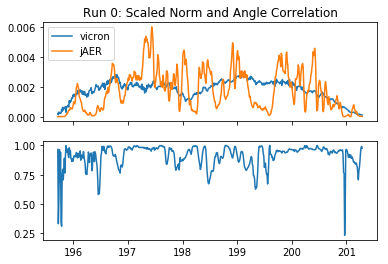

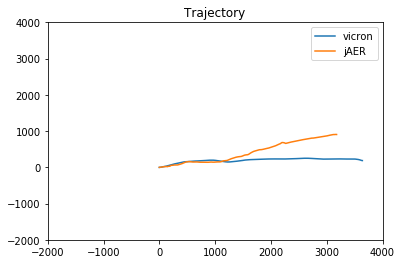

In [9]:
graph_correlation(0, return_values=False)

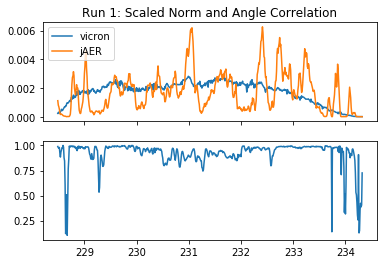

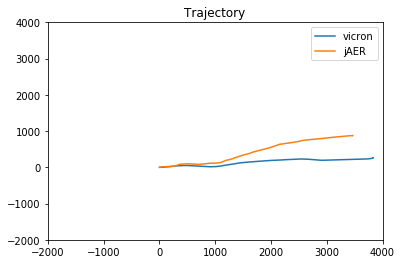

In [10]:
graph_correlation(1, return_values=False)

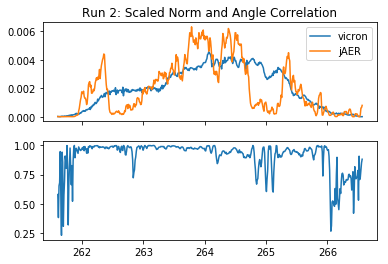

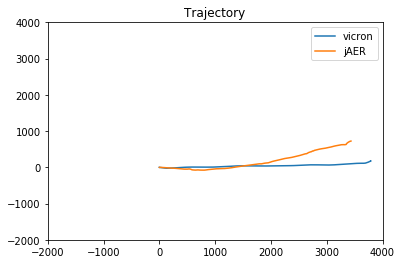

In [11]:
graph_correlation(2, return_values=False)

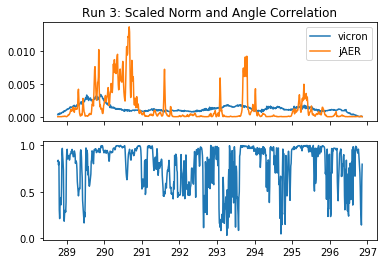

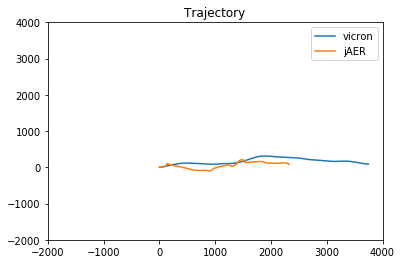

In [12]:
graph_correlation(3, return_values=False)